![alt text](Python09-OpenCV_extra/logos.jpeg)

Сегодня речь пойдёт про обработку изображений в python. Тема необъятная, но какие-то основы мы разберём.

# Pillow

Pillow - это Python Imaging Library (PIL). Библиотека, добавляющая простую поддержку изображений: открыть, манипулировать, сохранить. 
Установка:
pip install pillow 

In [1]:
from PIL import Image

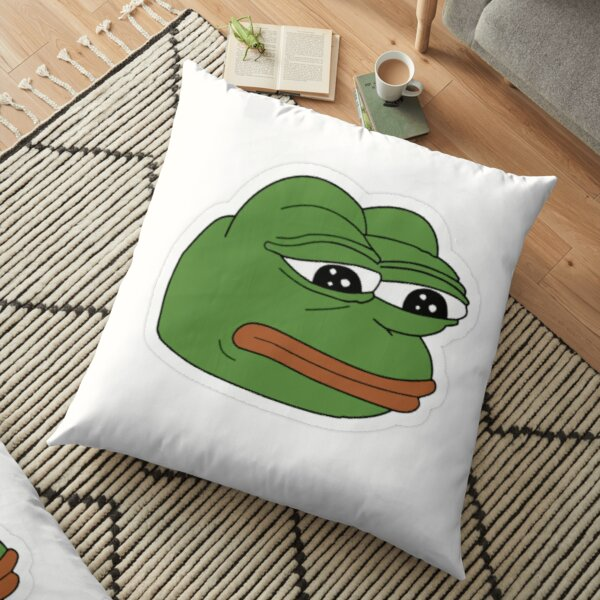

In [2]:
my_pil_image = Image.open("Python09-OpenCV_extra/what_is_pillow.jpeg")

my_pil_image.show() # чтобы посмотреть в отдельном окне (которого вы не видите из-за особенностей Zoom)
display(my_pil_image) # чтобы посмотреть прямо тут 

In [3]:
# Тип объекта
type(my_pil_image)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
# Посмотреть информацию о нашем изображении
print("Format: {0}\nSize: {1}\nMode: {2}".format(my_pil_image.format, my_pil_image.size, my_pil_image.mode))

Format: JPEG
Size: (600, 600)
Mode: RGB


In [5]:
# Чтобы не путать очередность высоты и ширины, можно вызывать их напрямую
print('width: {}, height: {}'.format(my_pil_image.width, my_pil_image.height))

width: 600, height: 600


In [6]:
# Сохранить изображение
my_pil_image.save('Python09-OpenCV_extra/what_is_pillow.png', 'png') 
# Так можно сохраниить в одном любом популярном формате, например jpg или png (более 30 форматов)

Большая часть лично моего общения с PIL сводится именно к этим базовым действиям, которые легко, просто и быстро сделать. Что-то более сложное обычно делается другими методами. 

Дело в том что PIL рассматривает изображение именно как изображение, а не как массив пикселей с которыми было бы легко работать. 

Однако есть ещё кое-какие полезные функции.

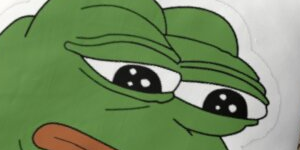

In [7]:
# Кроп
cropped = my_pil_image.crop((200, 200, 500, 350))
display(cropped)

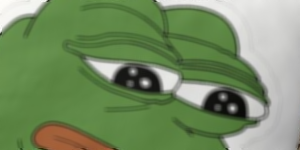

In [8]:
# Различные фильтры, например блюр
from PIL import ImageFilter 

blurred = cropped.filter(ImageFilter.BLUR)
display(blurred)

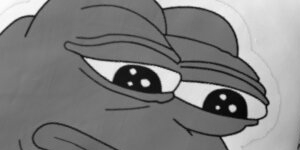

In [9]:
# Оттенки серого
grayscale = cropped.convert('L') 
display(grayscale)

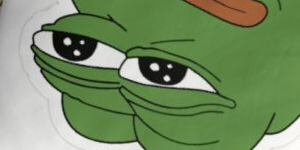

In [10]:
# Поворот
rotated = cropped.rotate(180)
display(rotated)

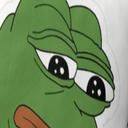

In [11]:
# Изменение размера
resized = cropped.resize((128,128), Image.ANTIALIAS)
display(resized)

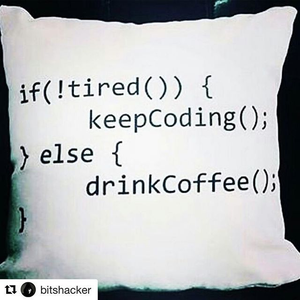

In [12]:
# Чтение по ссылке из интернета
import requests

url = 'https://i.pinimg.com/originals/db/d0/79/dbd0790244b52e00d03c5d8be3b8d4d1.jpg'

try:
    resp = requests.get(url, stream=True).raw    
except requests.exceptions.RequestException as e:  
    sys.exit(1)

try:
    url_img = Image.open(resp).resize((300,300), Image.ANTIALIAS)
except IOError:
    print("Unable to open image")
    sys.exit(1)
    
display(url_img)

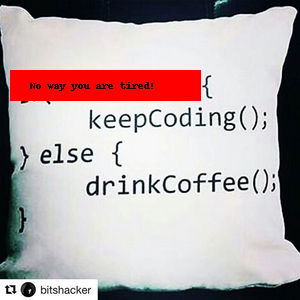

In [13]:
# Рисование
from PIL import ImageDraw

idraw = ImageDraw.Draw(url_img)

idraw.rectangle((10, 70, 200, 100), fill='red')
idraw.text((30, 80), "No way you are tired!", 40)
display(url_img)

Рисовать можно много чего, множество свойств, детально посмотреть можно тут 
https://pillow.readthedocs.io/en/3.1.x/reference/ImageDraw.html

In [14]:
# Склейка картинок
def img_concat(im1, im2):    
    # Создадим новое изображение с удвоенной высотой
    dst = Image.new('RGB', (im1.width, im1.height + im2.height)) 
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

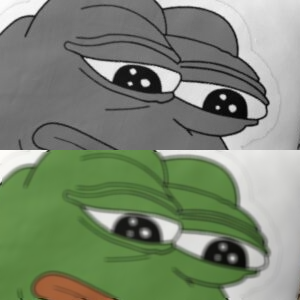

In [15]:
merged_img = img_concat(grayscale, blurred)
display(merged_img)

На этом с PIL завершим.
Запомним вот что: 

* Очередность каналов: RGB
* Очередность размеров: ширина, высота
* Очередность координат в прямоугольнике: X1, Y1, X2, Y2

# Scikit-image

Scikit-image (skimage) - библиотека алгоритмов для обработки изображений, использующая numpy массивы для представления изображений.

Установка: pip install scikit-image

В отличии от PIL теперь мы имеем в качестве объекта массив размера (height, width, channel), что дает нам простой доступ к каждому пикселю. В качестве примера удобства numpy нашёл вот такой код, рисующий шахматную доску в четыре строки

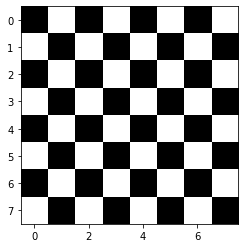

In [16]:
import numpy as np
import matplotlib.pyplot as plt

check = np.zeros((8, 8))
check[::2, 1::2] = 1 # чётные
check[1::2, ::2] = 1 # нечётные
plt.imshow(check, cmap='gray') 

C matplotlib мы разобрались на прошлой лекции, поэтому постараемся пользоваться им минималистично чтобы не отвлекаться от сегодняшней темы

In [17]:
from skimage import io # Модуль чтобы читать-писать в разных форматах

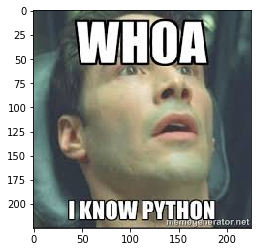

In [18]:
# Открыть изображение
my_image = io.imread('Python09-OpenCV_extra/I_know_python.jpeg')
plt.imshow(my_image) 

In [19]:
print(type(my_image))

<class 'numpy.ndarray'>


In [20]:
# Отлично, посмотрим свойства как у numpy
print('dtype: {}; shape: {}'.format(my_image.dtype, my_image.shape))

dtype: uint8; shape: (225, 225, 3)


In [ ]:
# Заглянем внутрь
my_image

Обратите внимание на нормировку - значения от 0 до 255. Skimage работает и с float, поэтому надо самостоятельно держать это в голове.

In [ ]:
from skimage import img_as_float # Можно было просто разделить на 255, но так надёжнее

my_image_float = img_as_float(my_image) 
my_image_float

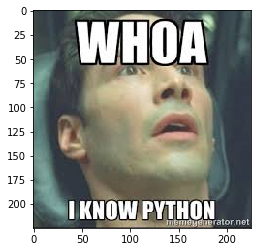

In [23]:
plt.imshow(my_image_float) 
# Понимание изображения не утрачено

In [24]:
# Сохранение изображения/
io.imsave('Python09-OpenCV_extra/skimage_png_emaple.png', my_image)
# Указывать выходной формат не обязательно, он сам поймёт

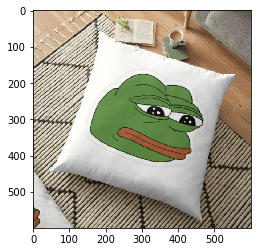

In [25]:
# Переведём изображение из PIL
skimage_image = np.array(my_pil_image)
plt.imshow(skimage_image) 

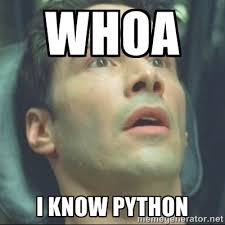

In [26]:
# Переведём в PIL
pil_image = Image.fromarray(my_image)
display(pil_image)

Открыть, посмотреть и сохранить неизменно лидируют по популярности. Но это можно было и в PIL. Теперь давайте разбираться зачем мы здесь.

/home/andrey/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.


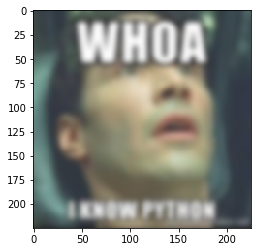

In [27]:
from skimage import filters # Множество простых фильтров на любые потребности

# Заблюрим изображение при помощи гауссова фильтра
my_image_gaussian = filters.gaussian(my_image, sigma=3)
plt.imshow(my_image_gaussian)

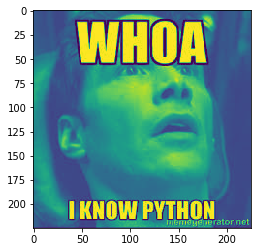

In [28]:
from skimage import color # Любые трансформации цветов 

img_gray = color.rgb2gray(my_image)
plt.imshow(img_gray)
#plt.imshow(img_gray, cmap='gray')

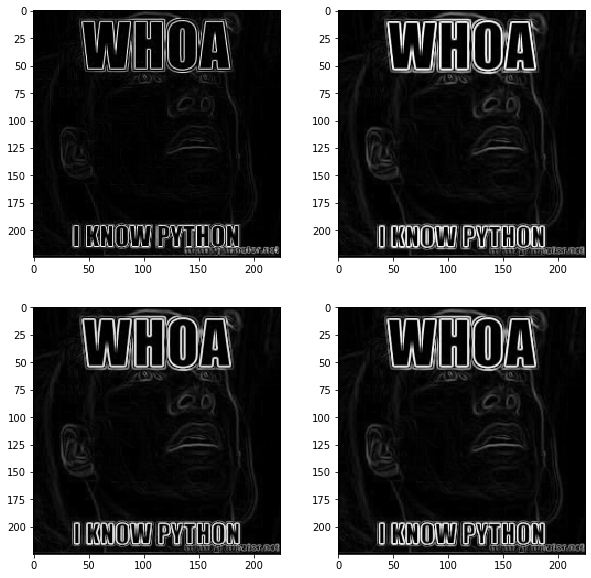

In [29]:
# Найдём на изображении контуры несколькими способами.
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
plt.imshow(filters.roberts(img_gray), cmap='gray') # Фильтр Робертса
fig.add_subplot(2, 2, 2)
plt.imshow(filters.prewitt(img_gray), cmap='gray') # Фильтр Прюитта
fig.add_subplot(2, 2, 3)
plt.imshow(filters.scharr(img_gray), cmap='gray') # Фильтр Щара (?)
fig.add_subplot(2, 2, 4)
plt.imshow(filters.sobel(img_gray), cmap='gray') # Фильтр Собеля
plt.show()

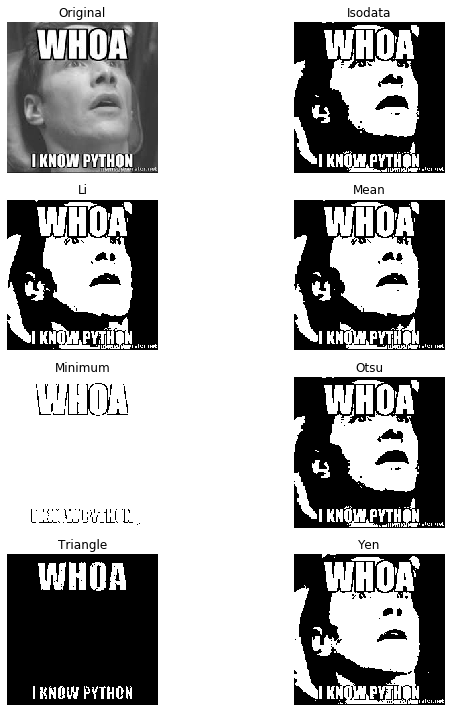

In [30]:
# Прогоним изображение через фильтры по порогу, рассчитанному разными методами, реализованными в skimage
# Можно любой из них вытаскивать как и прежде, а можно
fig = filters.try_all_threshold(img_gray, figsize=(10, 10), verbose=False)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


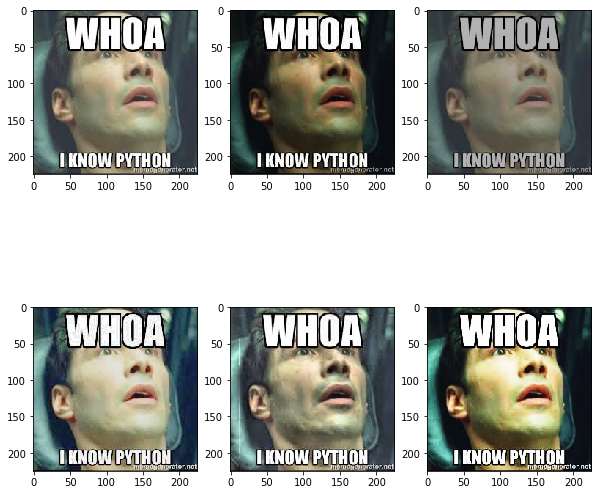

In [31]:
from skimage import exposure # нелокальные фильтры (используют большую часть картинки или всю её)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(2, 3, 1)
plt.imshow(my_image)

# Гамма коррекция
fig.add_subplot(2, 3, 2)
plt.imshow(exposure.adjust_gamma(my_image, 2))

# Логарифмическая коррекция
fig.add_subplot(2, 3, 3)
plt.imshow(exposure.adjust_log(my_image, 0.7))

# Выравнивание гистрограмм
fig.add_subplot(2, 3, 4)
plt.imshow(exposure.equalize_hist(my_image))

# Адаптивное выравнивание гистограмм
fig.add_subplot(2, 3, 5)
plt.imshow(exposure.equalize_adapthist(my_image))

# Сигмоидальная настройка
fig.add_subplot(2, 3, 6)
plt.imshow(exposure.adjust_sigmoid(my_image))
plt.show()

In [32]:
# Более сложные алгоритмы, нацеленные на широкий спектр задач. 
# Зачастую на выходе имеем не изображение, а набор признаков
from skimage import feature

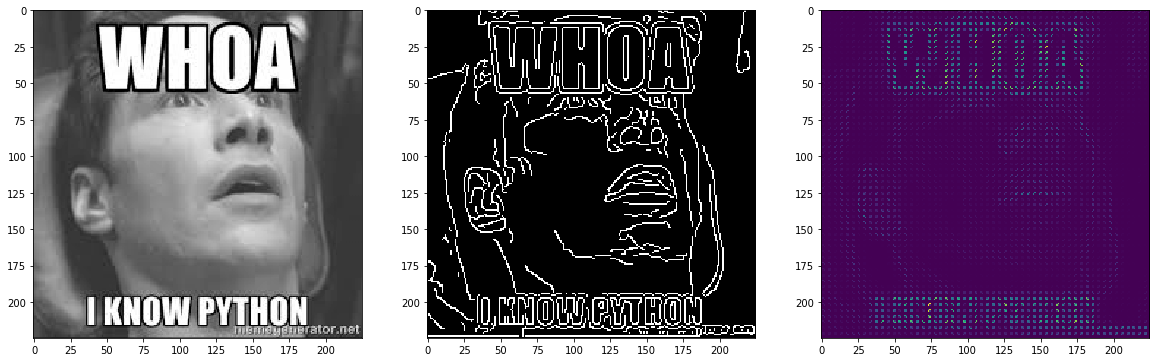

In [33]:
fig=plt.figure(figsize=(20, 30))
fig.add_subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray') 
fig.add_subplot(1, 3, 2)

# Детектор Кенни
plt.imshow(feature.canny(img_gray), cmap='gray') 
fig.add_subplot(1, 3, 3)

# Гистограммы ориентированных градиентов (HOG)
fd, hog_image = feature.hog(my_image, orientations=16, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
plt.imshow(hog_image) 
plt.show()

Давайте возьмём из модуля features каскадный классификатор, найдём его предобученные веса для объекта "фронтальное лицо", поищем лицо на нашей фотографии и построим прямоугольник

In [34]:
from matplotlib.patches import Rectangle
from skimage import data 

В модуле data находятся разные сохранённые данные: предобученные алгоритмы, изображения, базы данных и прочее. Не будем на этом фокусироваться, потому что само по себе оно никогда не нужно, а когда вдруг понадобится - всегда есть ссылка. Зачастую этим модулем удобно пользоваться для воспроизведения примеров.

[{'r': 53, 'c': 103, 'width': 95, 'height': 95}]


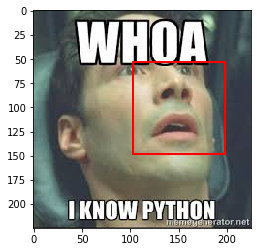

In [35]:
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = feature.Cascade(trained_file)
detected = detector.detect_multi_scale(img=my_image,
                                       scale_factor=1.1,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(300, 300))
print(detected)

plt.imshow(my_image)
img_desc = plt.gca() # get current axis

for patch in detected:
    img_desc.add_patch(
        Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

Обратили внимание что прямоугольник задаётся не как в PIL?

Давайте рассмотрим ещё одну нетривиальную задачу, сначала испортим изображение случайным шумом, а потом попробуем его восстановить. Ривз, устал, давайте сменим изображение на более простое текстуру.

In [ ]:
# Модуль восстановления/улучшения изображений. Возьмём самые популярные:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet

# Случайный шум (соль и перец), с ним и будем бороться
from skimage.util import random_noise 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


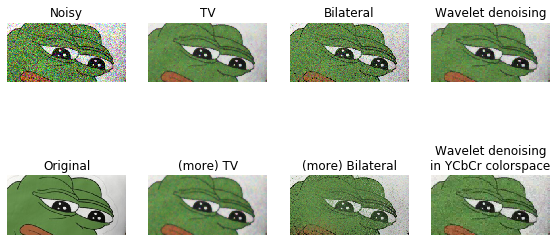

In [38]:
original = np.array(cropped)

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

Кто-то, конечно, может сказать что восстанавливая изображение мы испортили его, но тут уж на вкус и цвет все метрики разные

Наш лимит времени на skimage исчерпан, и мы много чего не посмотрели и никак не можем этого успеть в рамках половины лекции. 
![no time](Python09-OpenCV_extra/no_time.jpg)
Что нам надо запомнить о skimage? В нём есть много алгоритмов различной обработки изображений, начиная от примитивных, заканчивая достаточно интеллектуальными:     
* Geometric transformations, 
* Color space manipulation,
* Analysis,
* Filtering, 
* Segmentation,
* Morphology,
* Feature detection, 
* more 

Достаточно много примеров можно найти на официальном сайте https://scikit-image.org/docs/dev/auto_examples/


# OpenCV

OpenCV - Open Source Computer Vision Library. 
Библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом. Реализована на C/C++, также разрабатывается для других языков, в том числе python. Может свободно использоваться в любых целях, за исключением нескольких платных пакетов. Активно использует параллелизм, как CPU так и на GPU, и вообще достаточно активно внедряет всё новое в свою библиотеку.

На официальном сайте написано что у них около 50 тысяч пользователей в сообществе, и более 18 млн скачек библиотеки.

Установка не такая простая как это было всегда до этого, и если мы хотим чтобы библиотека имела полный функционал (например, можно было работать с вебкамерой, и видео в целом), то придётся заморочиться. Но чтобы просто попробовать - достаточно будет **pip install opencv-python**. Более правильные варианты установки лучше гуглить, потому что библиотека постоянно обновляется, и варианты установки могут розниться в зависимости от того, что именно вы хотите с ней делать.

In [1]:
# Импортируем так
import cv2 

In [2]:
# Проверим любимые команды
test_image = cv2.imread("Python09-OpenCV_extra/opencv.jpg")
(h, w, d) = test_image.shape 
# Сначала высота, потом ширина, дальше каналы
print("height={}, width={}, depth={}".format(h, w, d))

height=720, width=1280, depth=3


In [3]:
cv2.imshow("Image", test_image)
cv2.waitKey(0)                  # ждёт любую кнопку, с задержкой 0 милисекунд
cv2.destroyAllWindows()         # закрывает все открытые ранее окна

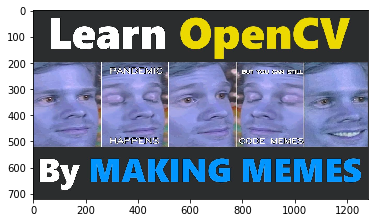

In [4]:
# В самом Jupyter работать будет только через matplotlib.
from matplotlib import pyplot as plt

plt.imshow(test_image)

Самые наблюдательные из вас, могут заметить, что цвет лица на меме слегка отдаёт голубизной. Дело тут не в не в том что мем дефектный, а в том что OpenCV более 20 лет, он был создан раньше чем был принят формат RGB. Ранее был формат BGR, и он сохранён в библиотеке. И если в самом OpenCV это не вызывает внутренних противоречий, то при совместной работе с другими пакетами, например matplotlib надо об этом не забывать, чтобы не расплескать синеву по датасетам. 

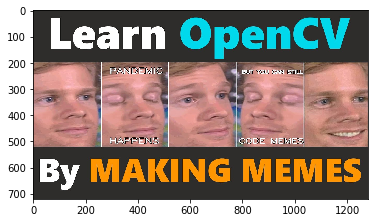

In [5]:
test_img_RGB = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_RGB)
# Так будет лучше

In [ ]:
print(type(test_image)) # Тут ничего нового
print(test_image) # Тут тоже

In [7]:
cv2.imwrite('Python09-OpenCV_extra/new_img_opencv.jpg', test_img_RGB)

True

Не забываем что чтобы сделать RGB мы поменяли каналы, но это не значит что opencv передумал, он по прежнему думает что это BGR, и при записи учтёт это.

Функционал. В OpenCV есть множество алгоритмов, схожих с skimage, фильтры, обработка, восстановление и т.д. Но основная направленность всё же на компьютерное зрение. Его давайте и рассмотрим на примерах. Решим великую задачу машинного обучения - распознавание цифр, при помощи OpenCV, разумеется. 

Продвинутые алгоритмы для работы с большими сложными базами вам рассказывают на курсе машинного обучения, а здесь мы попробуем насладиться простотой и обучиться распознавать простые цифры по одной картинке.

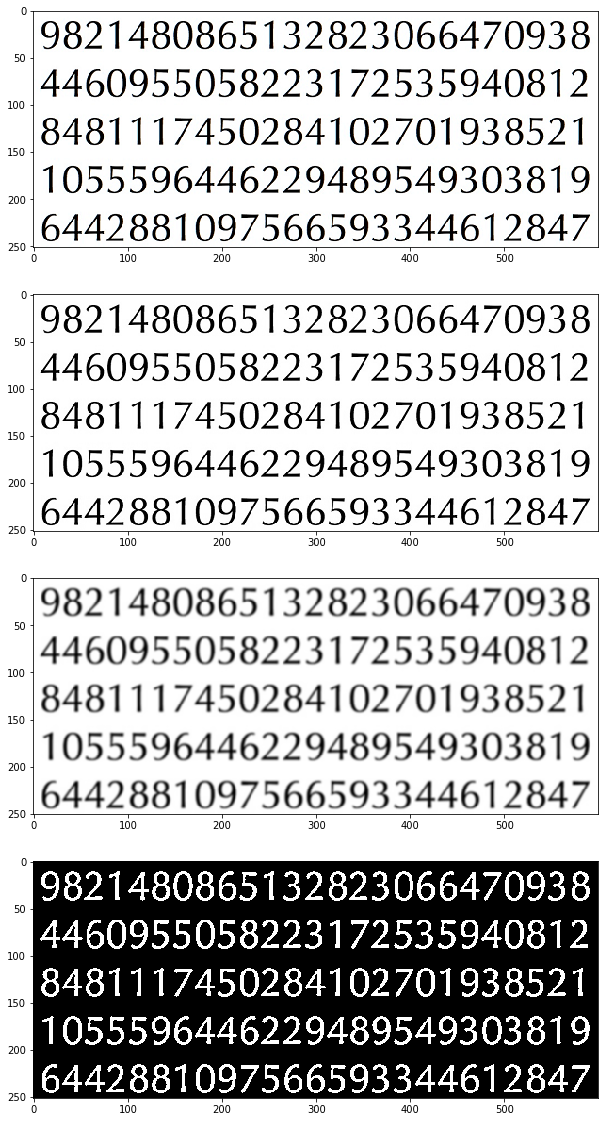

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

train_image = cv2.imread('./Python09-OpenCV_extra/data/train.png') 
# Проведём предобработку как ранее пробовали на skimage
gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)      # переводим в серый
blur = cv2.GaussianBlur(gray, (5, 5), 0)                  # блюрим (чтобы "сгладить" изображение)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)    # фильтруем по порогу

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(4, 1, 1)
plt.imshow(train_image)
fig.add_subplot(4, 1, 2)
plt.imshow(gray, cmap='gray')
fig.add_subplot(4, 1, 3)
plt.imshow(blur, cmap='gray')
fig.add_subplot(4, 1, 4)
plt.imshow(thresh, cmap='gray')

In [9]:
# Найдём контуры
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
# print(len(contours))        

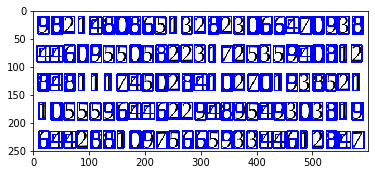

In [10]:
# Ну, раз ничего непонятно, то давайте просто посмотрим
train_image_copy = train_image.copy()
for cnt in contours:        
    [x, y, w, h] = cv2.boundingRect(cnt) # извлекаем левый верхний угол и размеры контуров
    # А вот чтобы построить прямоугольник - надо задавать два набора координат!
    cv2.rectangle(train_image_copy, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.imshow(train_image_copy, cmap='gray')

Теперь понятно, некоторые цифры получили несколько "сработок". Не беда, возьмём только самые большие.

In [11]:
# Заведём пустые места для записи лэйблов 
samples = np.empty((0, 100), np.float32)
responses = []
keys = [i for i in range(48, 58)] # соответствуюет клавишам цифр от 0 до 9 на стандартной раскладке

In [12]:
# Напишем простенький алгоритм интерактивной разметки
for cnt in contours:    
    if cv2.contourArea(cnt) > 50: # отсеиваем все малые контуры
        [x, y, w, h] = cv2.boundingRect(cnt)

        if h > 28: # отсеиваем "половинки" цифр
            cv2.rectangle(train_image, (x, y), (x + w, y + h), (0, 0, 255), 2)            
            
            # Выводим новый контур
            cv2.imshow('norm', train_image)
            
            # И ждём разметку для него с клавиатуры
            key = cv2.waitKey(0)
            
            # Сделаем кнопку "q" стоп-словом, на случай если надоест размечать
            if key == ord('q'):
                cv2.destroyAllWindows()
                break
            
            elif key in keys:
                # Понимаем и запоминаем разметку с клавиатуры
                responses.append(int(chr(key))) 
                
                # Находим соответствующий ему фрагмент изображения
                roi = thresh[y:y + h, x:x + w]
                
                # Для удобства - отнормируем на 10 пикселей
                roismall = cv2.resize(roi, (10, 10)) 
                sample = roismall.reshape((1, 100)) 
                
                # И тоже запомним
                samples = np.append(samples, sample, 0)                
                

responses = np.array(responses, np.float32)
responses = responses.reshape((responses.size, 1))
print ("training complete")

samples = np.float32(samples)
responses = np.float32(responses)

cv2.imwrite("./Python09-OpenCV_extra/data/train_result.png", train_image)
np.savetxt('./Python09-OpenCV_extra/data/generalsamples.data', samples)
np.savetxt('./Python09-OpenCV_extra/data/generalresponses.data', responses)

training complete


In [13]:
# Обучим KNN на наших данных
model = cv2.ml.KNearest_create()
model.train(samples, cv2.ml.ROW_SAMPLE, responses)

True

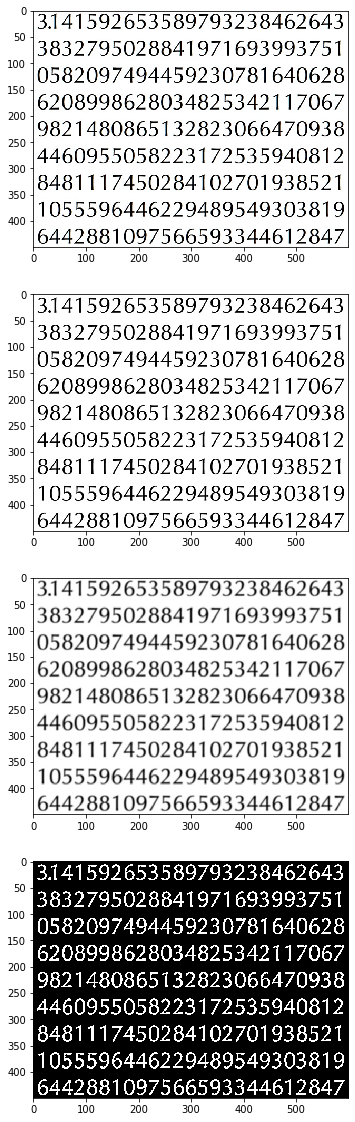

In [14]:
test_image = cv2.imread('./Python09-OpenCV_extra/data/test.png') 
# Проведём предобработку как ранее пробовали на skimage
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)      # переводим в серый
blur = cv2.GaussianBlur(gray, (5, 5), 0)                  # блюрим (чтобы "сгладить" изображение)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)    # фильтруем по порогу

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(4, 1, 1)
plt.imshow(test_image)
fig.add_subplot(4, 1, 2)
plt.imshow(gray, cmap='gray')
fig.add_subplot(4, 1, 3)
plt.imshow(blur, cmap='gray')
fig.add_subplot(4, 1, 4)
plt.imshow(thresh, cmap='gray')

In [15]:
# Создадим чистую картинку такого же размера, чтобы написать на ней результаты распознавания
out = np.zeros(test_image.shape, np.uint8)

In [16]:
# Повторим поиск и отсев контуров
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    if cv2.contourArea(cnt) > 50:
        [x, y, w, h] = cv2.boundingRect(cnt)
        if h > 28:
            cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = thresh[y:y + h, x:x + w]
            roismall = cv2.resize(roi, (10, 10))
            roismall = roismall.reshape((1, 100))
            roismall = np.float32(roismall)
            
            # Ищем самый похожий фрагмент по размеченному трейну
            retval, results, neigh_resp, dists = model.findNearest(roismall, k=1)
            
            # напишем его на нашей чистой картинке на соответсвующей позиции
            string = str(int((results[0][0])))
            cv2.putText(out, string, (x, y + h), 0, 1, (0, 255, 0))

In [17]:
# Ну всё, давайте смотреть что вышло
cv2.imshow('out', out)

key = cv2.waitKey(0)
if key == ord('q'):
    cv2.destroyAllWindows()
    

Как видим, всё отлично распозналось, если я не ошибся при разметке и не заленился сделать хотя бы пару строк. 